IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      59.0  0.001886   0.007222   -0.337938   0.084899          0.0   
1      58.0 -0.044485   0.009085    0.707079   0.105078          0.0   
2      49.0 -0.044653   0.009246    0.661962   0.105909          0.0   
3      60.0 -0.055820   0.026113   -0.896863   0.170777          0.0   
4      73.0 -0.036747   0.010128    1.833895   0.107026         77.0   
...     ...       ...        ...         ...        ...          ...   
1344   71.0 -0.118940   0.033278   -0.658552   0.217590          0.0   
1345   53.0 -0.128318   0.032381   -0.698683   0.220831          0.0   
1346   51.0 -0.129222   0.032372   -0.700008   0.221338          0.0   
1347   79.0 -0.015528   0.017540    3.593408   0.133192          0.0   
1348   75.0 -0.040308   0.020004   -0.258574   0.146906        129.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0           113.0    4.919414    3.513865  0.014481  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.001886   0.007222   -0.337938   0.084899          0.0        113.0   
1    -0.044485   0.009085    0.707079   0.105078          0.0        111.0   
2    -0.044653   0.009246    0.661962   0.105909          0.0         82.0   
3    -0.055820   0.026113   -0.896863   0.170777          0.0         91.0   
4    -0.036747   0.010128    1.833895   0.107026         77.0         97.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.118940   0.033278   -0.658552   0.217590          0.0        134.0   
1345 -0.128318   0.032381   -0.698683   0.220831          0.0        119.0   
1346 -0.129222   0.032372   -0.700008   0.221338          0.0        129.0   
1347 -0.015528   0.017540    3.593408   0.133192          0.0        108.0   
1348 -0.040308   0.020004   -0.258574   0.146906        129.0         97.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.121718   0.037766    -0.34321   0.229101         84.0         61.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    9.362917    5.485954   0.03903   0.010355  ...       11632.69369   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340          3.28805          0.589059          -0.908478           3.37622   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               137.0               136.0          50.244282   

     amp2(Curr(ESC_5))  Guasto  
340          34.057169       1  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.001886   0.007222   -0.337938   0.084899          0.0        113.0   
1    -0.044485   0.009085    0.707079   0.105078          0.0        111.0   
2    -0.044653   0.009246    0.661962   0.105909          0.0         82.0   
3    -0.055820   0.026113   -0.896863   0.170777          0.0         91.0   
4    -0.036747   0.010128    1.833895   0.107026         77.0         97.0   
...        ...        ...         ...        ...          ...          ...   
1344 -0.118940   0.033278   -0.658552   0.217590          0.0        134.0   
1345 -0.128318   0.032381   -0.698683   0.220831          0.0        119.0   
1346 -0.129222   0.032372   -0.700008   0.221338          0.0        129.0   
1347 -0.015528   0.017540    3.593408   0.133192          0.0        108.0   
1348 -0.040308   0.020004   -0.258574   0.146906        129.0         97.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0     0.001886   0.007222   -0.337938   0.084899     0.000000   113.000000   
1    -0.044485   0.009085    0.707079   0.105078     0.000000   111.000000   
2    -0.044653   0.009246    0.661962   0.105909     0.000000    82.000000   
3    -0.055820   0.026113   -0.896863   0.170777     0.000000    91.000000   
4    -0.036747   0.010128    1.833895   0.107026    77.000000    97.000000   
...        ...        ...         ...        ...          ...          ...   
1618  0.009499   0.007583   -0.462187   0.087475    67.432930    82.134140   
1619  0.001385   0.011058    3.197870   0.105021    61.028574    81.434289   
1620 -0.023011   0.009683    2.501677   0.100932    76.965650    57.000000   
1621 -0.130691   0.041674   -1.544242   0.242159    62.672591    80.508887   
1622 -0.036828   0.010129    1.831105   0.107060    77.653453    98.633632   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=50)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=50, score_func=<function f_regression at 0x000001D19C379120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True  True  True False False  True False
  True False False False  True False  True False  True False  True  True
 False False False False False False False False False False  True  True
 False False False False False False False False False  True False  True
  True False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False  True False  True  True False False
 False  True False False False False False  True  True False False  True
 False False False False False  True False False False False False False
 False False  True False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.337414
28         freq1(AccX)  3.502186
12         freq1(GyrY)  3.255537
11           RMS(GyrY)  2.832455
9            var(GyrY)  2.684033
153   kurt(RPM(ESC_5))  2.603243
93   freq2(RPM(ESC_1))  2.534269
92   freq1(RPM(ESC_1))  2.517783
14          amp1(GyrY)  2.418769
159   var(Curr(ESC_5))  2.161526
104     <>(RPM(ESC_2))  2.006542
8             <>(GyrY)  1.852921
152    var(RPM(ESC_5))  1.758597
78    amp1(RPM(ESC_0))  1.717410
107    RMS(RPM(ESC_2))  1.684388
32            <>(AccY)  1.599326
22          amp1(GyrZ)  1.579920
62         amp1(Pitch)  1.273320
30          amp1(AccX)  1.150422
80     <>(Curr(ESC_0))  1.016100
17           var(GyrZ)  1.015414
76   freq1(RPM(ESC_0))  1.011328
4          freq1(GyrX)  0.997683
57          var(Pitch)  0.910777
77   freq2(RPM(ESC_0))  0.870794
19           RMS(GyrZ)  0.857433
156   amp1(RPM(ESC_5))  0.790256
97    var(Curr(ESC_1))  0.659288
81    var(Curr(ESC_0))  0.638230
83    RMS(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 20, 21, 23, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 91, 94, 95, 96, 98, 99, 100, 101, 102, 105, 106, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0     0.001886   0.007222     0.000000  0.014481   0.005493   0.075428   
1    -0.044485   0.009085     0.000000  0.054327   0.004885   0.088459   
2    -0.044653   0.009246     0.000000  0.053108   0.004889   0.087735   
3    -0.055820   0.026113     0.000000 -0.017518   0.007915   0.090570   
4    -0.036747   0.010128    77.000000 -0.010199   0.005901   0.077405   
...        ...        ...          ...       ...        ...        ...   
1618  0.009499   0.007583    67.432930  0.021156   0.005602   0.077681   
1619  0.001385   0.011058    61.028574  0.066271   0.011558   0.126165   
1620 -0.023011   0.009683    76.965650 -0.008068   0.006353   0.080010   
1621 -0.130691   0.041674    62.672591  0.025705   0.009263   0.099492   
1622 -0.036828   0.010129    77.653453 -0.010201   0.005897   0.077377   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
0      114.000000    3.425774  

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.121718   0.037766         84.0   0.03903   0.010355   0.108869   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  freq1(RPM(ESC_3))  \
340        109.0    3.775227    1.960983   0.004916  ...               75.0   

     freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  var(RPM(ESC_5))  \
340               76.0         -1.191416            -0.6626    897639.503603   

     kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  amp2(RPM(ESC_5))  <>(Curr(ESC_5))  \
340         -1.485529      21728.760842       11632.69369          3.28805   

     var(Curr(ESC_5))  
340          0.589059  

[1 rows x 50 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
0     0.001886   0.007222     0.000000  0.014481   0.005663   -0.890339   
1    -0.044485   0.009085     0.000000  0.054327   0.006003   -1.421149   
2    -0.044653   0.009246     0.000000  0.053108   0.006075   -1.440570   
3    -0.055820   0.026113     0.000000 -0.017518   0.040416    0.602292   
4    -0.036747   0.010128    77.000000 -0.010199   0.004234   -1.229096   
...        ...        ...          ...       ...        ...         ...   
1618  0.009499   0.007583    67.432930  0.021156   0.005975   -0.887847   
1619  0.001385   0.011058    61.028574  0.066271   0.004418   -1.405731   
1620 -0.023011   0.009683    76.965650 -0.008068   0.004765   -1.410975   
1621 -0.130691   0.041674    62.672591  0.025705   0.005584   -0.884425   
1622 -0.036828   0.010129    77.653453 -0.010201   0.004231   -1.227885   

      RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  amp1(AccZ)  ...  freq1(Pitch)  \
0      0.156572    0.693167

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  kurt(GyrZ)  \
340 -0.121718   0.037766         84.0   0.03903   0.004916   -1.251977   

     RMS(GyrZ)  amp1(GyrZ)  <>(AccX)  amp1(AccZ)  ...  freq1(Pitch)  \
340   0.125249     0.90722  0.140577  220.503837  ...         125.0   

     kurt(RPM(ESC_1))  var(Curr(ESC_1))  amp2(Curr(ESC_1))  <>(RPM(ESC_2))  \
340          -1.02542          0.554482          14.627971        5432.095   

     var(Curr(ESC_2))  kurt(RPM(ESC_3))  kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  \
340          0.459236         -0.575181         -1.191416            -0.6626   

     amp2(RPM(ESC_5))  
340       11632.69369  

[1 rows x 21 columns]


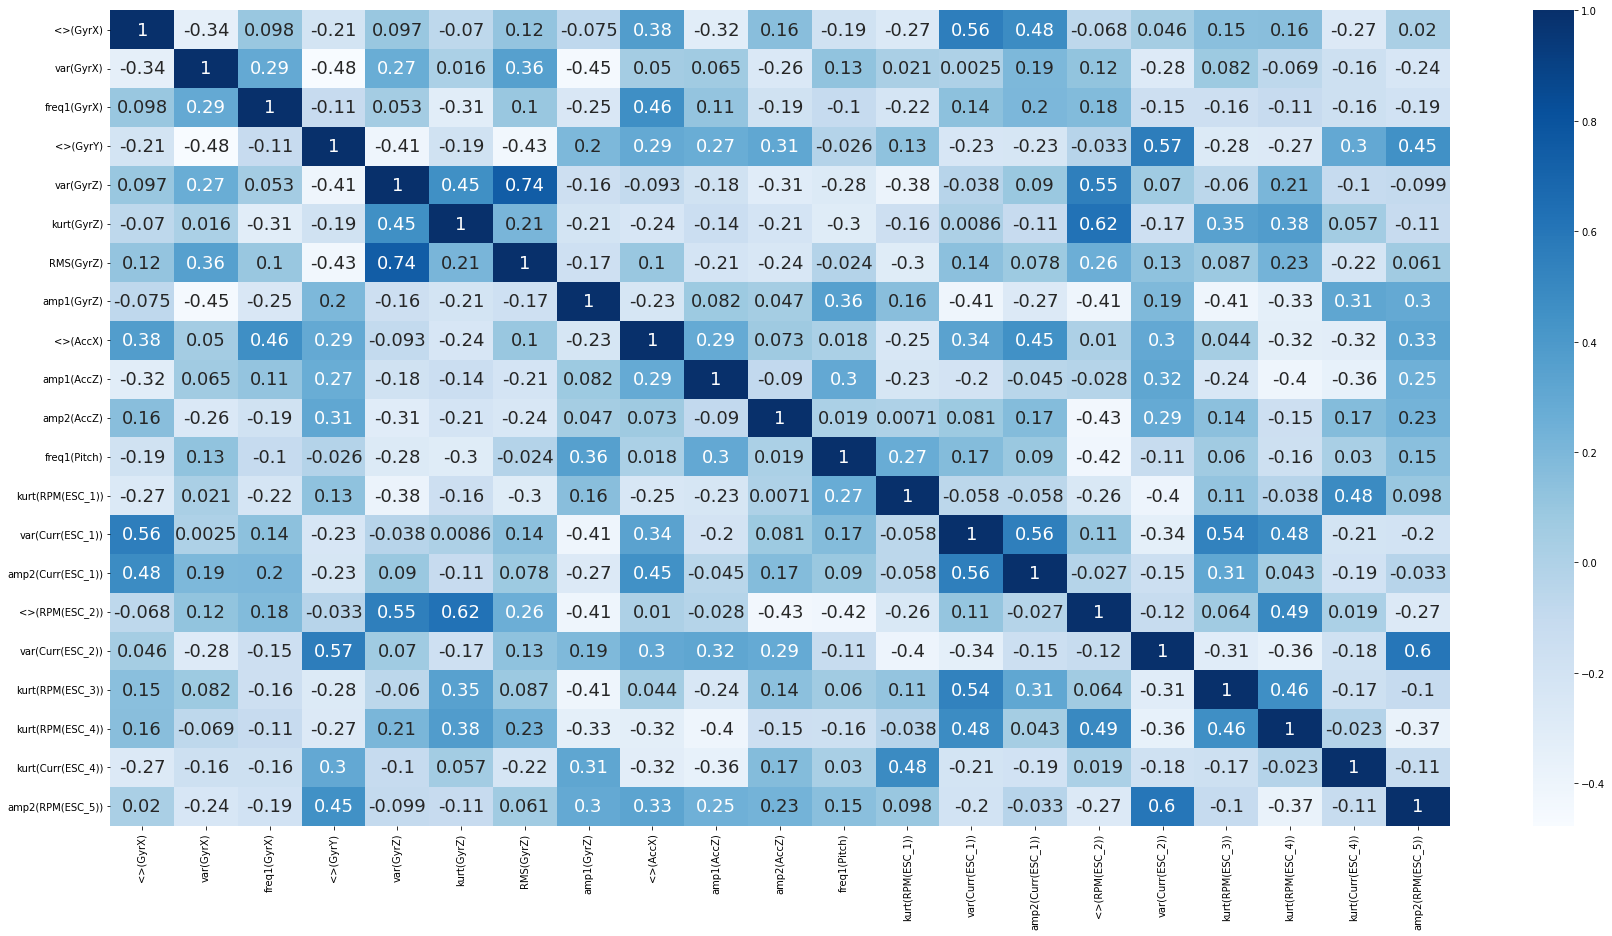

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1298, 21)
(325, 21)
(1298, 1)
(325, 1)


In [25]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

n_classes = 3

### Classificazione

Cross-Validation: [0.77307692 0.81153846 0.76923077 0.72586873 0.76833977]
Accuracy: 0.8 	 ---> LogisticRegression 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


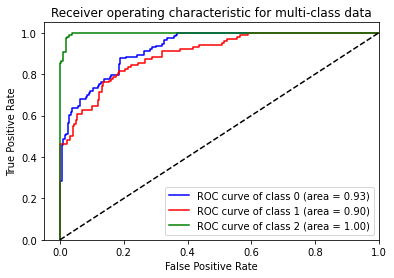

Cross-Validation: [0.54615385 0.49615385 0.53846154 0.46718147 0.52123552]
Accuracy: 0.52 	 ---> SVC 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


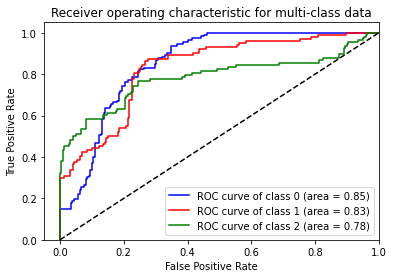

Cross-Validation: [0.61538462 0.72307692 0.74615385 0.64092664 0.68725869]
Accuracy: 0.82 	 ---> MLPClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


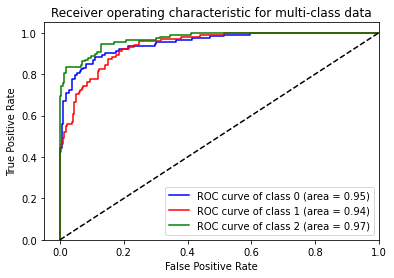

Cross-Validation: [0.49230769 0.64230769 0.37692308 0.63706564 0.55984556]
Accuracy: 0.66 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


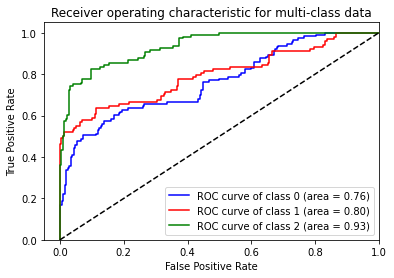

In [26]:
from itertools import cycle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

j=0
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    #fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    '''roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)'''

    

    if j != 2:
        clf = OneVsRestClassifier(clf)
        y_score = clf.fit(x_train, y_train).decision_function(x_test)
    else:
        y_score = clf.fit(x_train, y_train).predict_proba(x_test)

       

    lb = LabelBinarizer()
    y_true_bin = lb.fit_transform(y_test)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()
    
    j += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


### Matrici di confusione

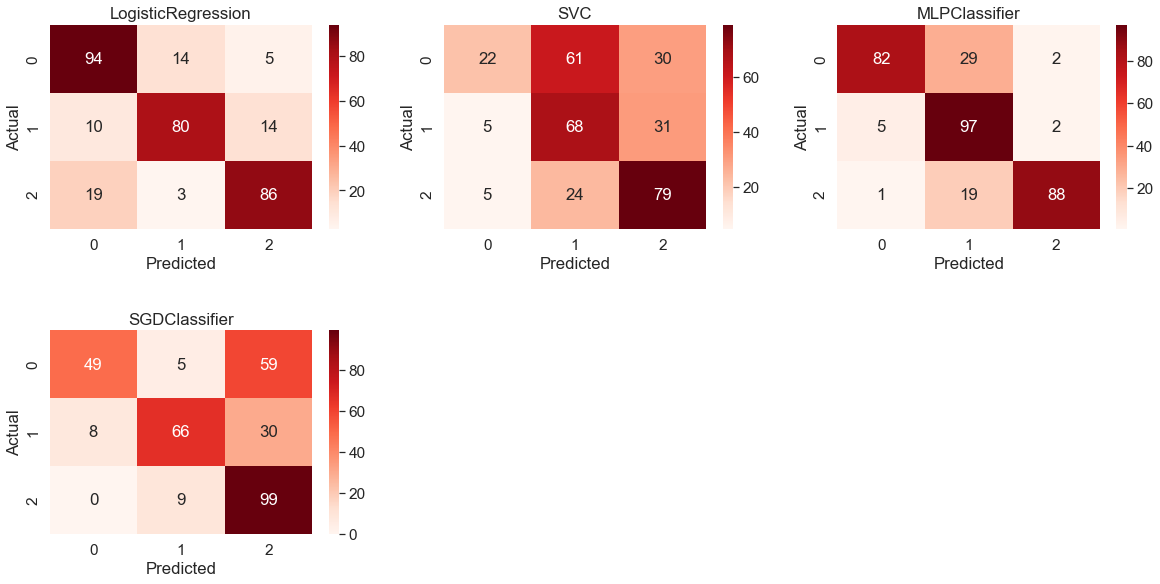

In [27]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

Cross Validation Score

Text(0.5, 1.0, 'Cross validation scores')

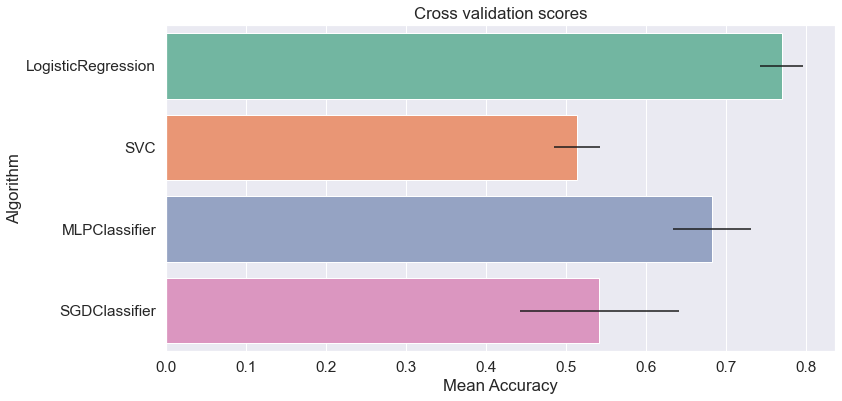

In [28]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

Report Classificazione

In [29]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.80       113
           1       0.82      0.77      0.80       104
           2       0.82      0.80      0.81       108

    accuracy                           0.80       325
   macro avg       0.80      0.80      0.80       325
weighted avg       0.80      0.80      0.80       325

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.19      0.30       113
           1       0.44      0.65      0.53       104
           2       0.56      0.73      0.64       108

    accuracy                           0.52       325
   macro avg       0.57      0.53      0.49       325
weighted avg       0.57      0.52      0.49       325

MLPClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       113
           1       0.67